# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [21]:
# Add dependencies
import pandas as pd
import requests
import json
import time 
import gmaps
import numpy as np

from scipy.stats import linregress
from matplotlib import pyplot as plt
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


#Define Google API Key
g =(g_key)

# Define OpenWeatherMap API Key
w = (weather_api_key)


## Generate Cities List

In [9]:
#url="http://api.openeweathermap.org/data/2.5/weather?city?"

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


## older code didn't work needs debugging
#build partial query URL
#query_url=f"{url}appid={weather_api_key}"
#reponse=requests.get(query_url)
#citydata=resonse.json()
#pprint(citydata)
#from pprint import pprint
#import requests
# r = requests.get('http://api.openweathermap.org/data/2.5/weather?q=city?&APPID={APIKEY}')
#pprint(r.json())



625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
#Create data log of 500 cities with corresponding weather data
# Construct city list from the jason file that is distributed by api.openweather.org, 
#save the list to "allcities.csv"

#with open('city.list.json', 'r',encoding='utf-8') as jsonfile:
    #jsndata = json.load(jsonfile)

#ids = []
#name = []
#country = []
#lats = []
#lons = []

#for i in range(len(jsndata)):
#   ids.append(jsndata[i]['id'])
#   name.append(jsndata[i]['name'].lower())
#   country.append(jsndata[i]['country'])
    

#    lat.append(jsndata[i]['coord']['lat'])
#    lon.append(jsndata[i]['coord']['lon'])
    
#dftemp = pd.DataFrame({'id':ids,'City':name,'Country':country,'Lat':lats,'Lng':lons})
#dftemp.to_csv("output_data/cities.csv", index=False, header=True)



#### needs debugging
#Build URL using the Google Maps API
base_url = "https://maps.googleapis.com/maps/api/geocode/json"

#Configure gmaps with API key
gmaps.configure(api_key=g_key)

# Create a base url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid= + api_keys"

# Counters
city_counter = 1
set_counter = 1

# Create the lists to hold relative data
cities_list= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("Started")

# Create a query url for each city in the cities list to get json response
for i, city in enumerate(cities):
    
    # Group cities as sets of 50s
    if (i % 50 == 0 and i >= 50):
        set_counter += 1
        city_counter = 1
         
    # Create API url for each city
    query_url = base_url +"&q=" + city
    
    # Get json respose for each city
    response = requests.get(query_url).json()
    
    # Print the results 
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
    
    # Increase city counter
    city_counter += 1
    
   # Add the values to the lists
    try:       
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
    except:
        print("City not found. Skipping...")
        pass
        
print("Completed")

## why so many cities not found?? doesn't look like instructor output
## no city number?? need code for city number output

Started
Processing Record 1 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 2 of Set 1 | strai
City not found. Skipping...
Processing Record 3 of Set 1 | jamestown
City not found. Skipping...
Processing Record 4 of Set 1 | busselton
City not found. Skipping...
Processing Record 5 of Set 1 | waddan
City not found. Skipping...
Processing Record 6 of Set 1 | pacific grove
City not found. Skipping...
Processing Record 7 of Set 1 | puerto ayora
City not found. Skipping...
Processing Record 8 of Set 1 | mikhaylovka
City not found. Skipping...
Processing Record 9 of Set 1 | tiksi
City not found. Skipping...
Processing Record 10 of Set 1 | nome
City not found. Skipping...
Processing Record 11 of Set 1 | avarua
City not found. Skipping...
Processing Record 12 of Set 1 | matola
City not found. Skipping...
Processing Record 13 of Set 1 | sorong
City not found. Skipping...
Processing Record 14 of Set 1 | qaanaaq
City not found. Skipping...
Processing Record 15 of Set 1 | mataura
C

Processing Record 21 of Set 3 | narragansett
City not found. Skipping...
Processing Record 22 of Set 3 | palabuhanratu
City not found. Skipping...
Processing Record 23 of Set 3 | trairi
City not found. Skipping...
Processing Record 24 of Set 3 | amderma
City not found. Skipping...
Processing Record 25 of Set 3 | ypsonas
City not found. Skipping...
Processing Record 26 of Set 3 | geraldton
City not found. Skipping...
Processing Record 27 of Set 3 | dauphin
City not found. Skipping...
Processing Record 28 of Set 3 | khatanga
City not found. Skipping...
Processing Record 29 of Set 3 | shache
City not found. Skipping...
Processing Record 30 of Set 3 | marawi
City not found. Skipping...
Processing Record 31 of Set 3 | agua verde
City not found. Skipping...
Processing Record 32 of Set 3 | del rio
City not found. Skipping...
Processing Record 33 of Set 3 | padang
City not found. Skipping...
Processing Record 34 of Set 3 | pisco
City not found. Skipping...
Processing Record 35 of Set 3 | atar


Processing Record 40 of Set 5 | bud
City not found. Skipping...
Processing Record 41 of Set 5 | bethel
City not found. Skipping...
Processing Record 42 of Set 5 | cidreira
City not found. Skipping...
Processing Record 43 of Set 5 | narsaq
City not found. Skipping...
Processing Record 44 of Set 5 | sitka
City not found. Skipping...
Processing Record 45 of Set 5 | port macquarie
City not found. Skipping...
Processing Record 46 of Set 5 | esperance
City not found. Skipping...
Processing Record 47 of Set 5 | chivilcoy
City not found. Skipping...
Processing Record 48 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 49 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 50 of Set 5 | lavrentiya
City not found. Skipping...
Processing Record 1 of Set 6 | zarate
City not found. Skipping...
Processing Record 2 of Set 6 | marovoay
City not found. Skipping...
Processing Record 3 of Set 6 | husavik
City not found. Skipping...
Processing Record 4 of Set 6 | nemur

Processing Record 9 of Set 8 | bertoua
City not found. Skipping...
Processing Record 10 of Set 8 | kandiari
City not found. Skipping...
Processing Record 11 of Set 8 | pierre
City not found. Skipping...
Processing Record 12 of Set 8 | araguaina
City not found. Skipping...
Processing Record 13 of Set 8 | kysyl-syr
City not found. Skipping...
Processing Record 14 of Set 8 | hanyang
City not found. Skipping...
Processing Record 15 of Set 8 | kununurra
City not found. Skipping...
Processing Record 16 of Set 8 | linhares
City not found. Skipping...
Processing Record 17 of Set 8 | san ignacio
City not found. Skipping...
Processing Record 18 of Set 8 | san quintin
City not found. Skipping...
Processing Record 19 of Set 8 | abu samrah
City not found. Skipping...
Processing Record 20 of Set 8 | san luis
City not found. Skipping...
Processing Record 21 of Set 8 | kazlu ruda
City not found. Skipping...
Processing Record 22 of Set 8 | klyuchi
City not found. Skipping...
Processing Record 23 of Set

Processing Record 28 of Set 10 | havoysund
City not found. Skipping...
Processing Record 29 of Set 10 | bonga
City not found. Skipping...
Processing Record 30 of Set 10 | zaozerne
City not found. Skipping...
Processing Record 31 of Set 10 | kologriv
City not found. Skipping...
Processing Record 32 of Set 10 | namatanai
City not found. Skipping...
Processing Record 33 of Set 10 | apatity
City not found. Skipping...
Processing Record 34 of Set 10 | baykit
City not found. Skipping...
Processing Record 35 of Set 10 | krasnoselkup
City not found. Skipping...
Processing Record 36 of Set 10 | alihe
City not found. Skipping...
Processing Record 37 of Set 10 | claremorris
City not found. Skipping...
Processing Record 38 of Set 10 | palmer
City not found. Skipping...
Processing Record 39 of Set 10 | hala
City not found. Skipping...
Processing Record 40 of Set 10 | ust-koksa
City not found. Skipping...
Processing Record 41 of Set 10 | laibin
City not found. Skipping...
Processing Record 42 of Set

Processing Record 45 of Set 12 | libertador general san martin
City not found. Skipping...
Processing Record 46 of Set 12 | bati
City not found. Skipping...
Processing Record 47 of Set 12 | khorixas
City not found. Skipping...
Processing Record 48 of Set 12 | tautira
City not found. Skipping...
Processing Record 49 of Set 12 | road town
City not found. Skipping...
Processing Record 50 of Set 12 | urulga
City not found. Skipping...
Processing Record 1 of Set 13 | vestmannaeyjar
City not found. Skipping...
Processing Record 2 of Set 13 | cukai
City not found. Skipping...
Processing Record 3 of Set 13 | turayf
City not found. Skipping...
Processing Record 4 of Set 13 | awbari
City not found. Skipping...
Processing Record 5 of Set 13 | quelimane
City not found. Skipping...
Processing Record 6 of Set 13 | beckley
City not found. Skipping...
Processing Record 7 of Set 13 | huancavelica
City not found. Skipping...
Processing Record 8 of Set 13 | wulanhaote
City not found. Skipping...
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
#print(cloudiness) ## why zeros???
print(len(cities_list))
print(len(cloudiness))
print(len(country))   
print(len(date))         
print(len(humidity))   
print(len(lat))    
print(len(lng))       
print(len(max_temp))    
print(len(wind_speed))

0
0
0
0
0
0
0
0
0


In [19]:
#export city data into a csv
#df.to_csv('file_name.csv')

# Store 'Lat' and 'Lng' into  locations 
#locations = geo_data[["Lat", "Lng"]].astype(float)

#generate latitude and longitude
#lat = geo_data["results"][0]["geometry"]["location"]["lat"]
#lng = geo_data["results"][0]["geometry"]["location"]["lng"]

# Print the latitude and longitude
#print('''
#    City: {0}
#    Latitude: {1}
#    Longitude: {2}
#    '''.format(target_city, lat, lng))


# set up additional columns to hold information
#types_df['city'] = ""
#types_df['lat'] = ""
#types_df['lng'] = ""
#types_df['max temp'] = ""
#types_df['humidity'] = ""
#types_df['cloudiness']= ""
#types_df['wind speed'] = ""
#types_df['country'] = ""
#types_df['date'] = ""

#types_df.head()

##second try
# Create a dictionary to keep data 
#weather_data = {
#     "City": cities_list,
#     "Cloudiness": cloudiness,
#     "Country": country,
#     "Date": date,
#     "Humidity": humidity,
#     "Lat": lat,
#     "Lng": lng,
#     "Max Temp": max_temp,
#     "Wind Speed": wind_speed    
# }

# Create the data frame and count variables for each columns
#weather_df = pd.DataFrame(weather_data)
#weather_df.count()
## ###why is everything zero??

## third try
weather_data_df = pd.DataFrame({
     'City':cities_list,
     'Cloudiness':cloudiness,
     'Country':country,
     'Date':date,
     'Humidity':humidity,
     'Lat':lat,
     'Lng':lng,
     'Max Temperature':max_temp,
     'Wind Speed':wind_speed,
     })
 
weather_data_df.head()
# Output File (CSV)
os.makedirs = os.path.join('output_data'),(exist_ok=True))
output_data_file = os.path.join("output_data","cities.csv")
weather_data_df.to_csv(output_data_file)
weather_data_df.count()


SyntaxError: invalid syntax (<ipython-input-19-5ab07e4fccbd>, line 66)

In [20]:
# Display the data frame
weather_data_df.head() ## why no data??

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
len(cities["Cities"])

In [ ]:
## data cleaning need help

output_data_file=pd.read_csv('output_data/cities.csv')
output_data_file.head()

count_cities_path = count_cities_path['City'].count()
count_cities_path

In [ ]:
#  Get the indices of cities that have humidity over 100%.




In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".




## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [ ]:
# Create a scatter plot for latitude and temprature
plt.scatter(weather_data_df["Lat"], weather_data_df["Max Temp"], marker = "o", facecolor = "navy", edgecolor="black")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (F)")
plt.grid()
plt.savefig("output_data/temperature.png")
plt.show()

## Latitude vs. Humidity Plot

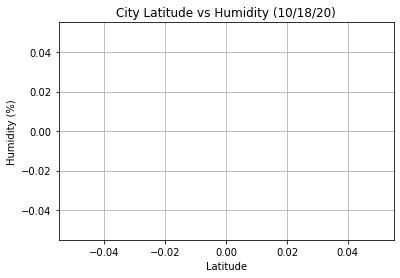

In [22]:
# Create a scatter plot for latitude and humidity
plt.scatter(weather_data_df["Lat"], weather_data_df["Humidity"], marker = "o", facecolor = "navy", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("output_data/humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

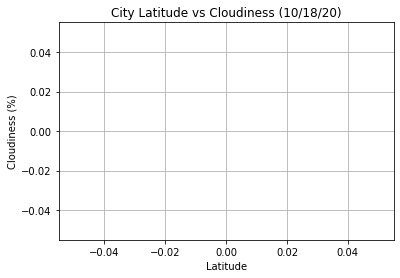

In [23]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Cloudiness"], marker = "o", facecolor = "navy", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("output_data/cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

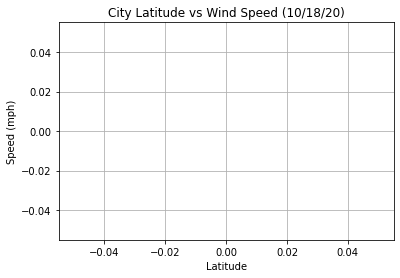

In [25]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Wind Speed"], marker = "o", facecolor = "navy", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Speed (mph)")
plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("output_data/wind_speed.png")
plt.show()

In [26]:
# save the dataframe as csv file
weather_data_df.to_csv("output_data/weather.csv", index=False, header=True)

## Linear Regression

In [28]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = weather_data_df['Latitude'].astype('float')
y_values = weather_data_df['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

KeyError: 'Latitude'

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [35]:

# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

x_label = "Lat"
y_label = "Max Temp"
labelpos = (0,25)
plot.py=linregress(northern["Lat"],northern["Max Temp"])

NameError: name 'northern' is not defined

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression